In [258]:
import numpy as np
from datascience import *
from pylab import *
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import math
import plotly
import plotly.express as px
import scipy.stats

In [181]:
# Data set
#greenhouse = pd.read_excel('ghgp_data_by_year.xlsx', engine = 'openpyxl')
greenhouse = Table.read_table('ghgp_data_by_year.csv')
#gg = greenhouse.rename(columns = {"Summary data collected by the Greenhouse Gas Reporting Program": "Facility Id", "Unnamed: 1" : "FRS Id", "Unnamed: 2" : "Facility Name", "Unnamed: 3": "City", "Unnamed: 4" : "State", "Unnamed: 5": "Zip Code", "Unnamed: 6": "Address", "Unnamed: 7" : "County", "Unnamed: 8" : "Latitude", "Unnamed: 9": "Longitude", "Unnamed: 10" : "Primary NAICS Code", "Unnamed: 11" : "Latest Reported Industry Type (subparts)", "Unnamed: 12": "Latest Reported Industry Type (sectors)", "Unnamed: 13": "2020 Total reported direct emissions", "Unnamed: 14": "2019 Total reported direct emissions",
                 #"Unnamed: 15": "2018 Total reported direct emissions", "Unnamed: 16" : "2017 Total reported direct emissions", "Unnamed: 17" : "2016 Total reported direct emissions", "Unnamed: 18" : "2015 Total reported direct emissions", "Unnamed: 19" :"2014 Total reported direct emissions" , "Unnamed: 20" : "2013 Total reported direct emissions", "Unnamed: 21": "2012 Total reported direct emissions", "Unnamed: 22" : "2012 Total reported direct emissions"})
greenhouse

Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary NAICS Code,Latest Reported Industry Type (subparts),Latest Reported Industry Type (sectors),2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
1004377,1.10044e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.3,-96.54,562212,HH,Waste,"504,064.00","518,680.25","653,854.00","250,497.50","221,014.75","199,011.75","241,883.50","289,953.25","204,000.00","194,000.00"
1010040,1.1007e+11,15-18565/15-18662,Hazard,KY,40701,4200 S. Hwy 15,PERRY COUNTY,37.22,-83.16,212112,FF,Other,nan,nan,"125,981.75","218,699.25","141,439.50","118,204.50","225,708.25","306,680.75","348,450.75","390,393.50"
1010085,1.10056e+11,15-19015,Hazard,KY,41701,1845 S. KY HWY 15,PERRY COUNTY,37.24,-83.18,212112,FF,Other,nan,nan,"93,918.75","70,265.00","35,907.00","55,872.50","68,761.00","57,767.00","41,513.00","64,664.50"
1012147,1.1007e+11,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,93251,22845 Highway 33,nan,35.32,-119.63,211130,"C,NN-FRAC,W-PROC","Natural Gas and Natural Gas Liquids Suppliers,Petroleum ...",nan,nan,"3,564.14","9,298.92","10,208.06",nan,nan,nan,nan,nan
1000112,1.1002e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,-74,221112,"C,D",Power Plants,"60,819.70","44,658.38","70,705.29","52,698.66","66,797.35","67,399.25","40,722.20","102,599.22","68,984.74","100,591.83"
1006394,nan,29-6 #2 Central Delivery Point,Blanco,NM,87412,nan,Rio Arriba,36.75,-107.45,213112,C,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"15,391.59","15,353.19","14,576.79","10,872.56","19,389.57"
1002885,nan,30-5 Central Delivery Point Compressor Station,Aztec,NM,87410,nan,Rio Arriba,36.81,-107.4,213112,C,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"22,506.52","21,883.57","22,329.72","26,701.30","36,223.16"
1002707,nan,31-6 Central Delivery Point,BLOOMFIELD,NM,87413,nan,Rio Arriba,36.84,-107.42,213112,C,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"52,646.75","62,914.16","68,228.44","66,669.84","66,286.81"
1003742,1.1001e+11,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.84,-87.92,562212,"C,HH",Waste,"100,500.95","18,925.40","31,220.15","29,026.80","120,657.60","92,696.60","120,707.35","97,467.50","87,357.75","95,113.25"
1002718,1.10044e+11,32-7 Central Delivery Point,BLANCO,NM,87412,nan,SAN JUAN,36.93,-107.56,213112,C,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"33,654.12","40,757.10","41,751.09","49,092.72","52,001.80"


In [182]:
gas_reduced = greenhouse.drop("FRS Id").drop("Address").drop("Primary NAICS Code").drop("Latest Reported Industry Type (subparts)").drop( "Zip Code")
gas_reduced


Facility Id,Facility Name,City,State,County,Latitude,Longitude,Latest Reported Industry Type (sectors),2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,COLLIN COUNTY,33.3,-96.54,Waste,"504,064.00","518,680.25","653,854.00","250,497.50","221,014.75","199,011.75","241,883.50","289,953.25","204,000.00","194,000.00"
1010040,15-18565/15-18662,Hazard,KY,PERRY COUNTY,37.22,-83.16,Other,nan,nan,"125,981.75","218,699.25","141,439.50","118,204.50","225,708.25","306,680.75","348,450.75","390,393.50"
1010085,15-19015,Hazard,KY,PERRY COUNTY,37.24,-83.18,Other,nan,nan,"93,918.75","70,265.00","35,907.00","55,872.50","68,761.00","57,767.00","41,513.00","64,664.50"
1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,nan,35.32,-119.63,"Natural Gas and Natural Gas Liquids Suppliers,Petroleum ...",nan,nan,"3,564.14","9,298.92","10,208.06",nan,nan,nan,nan,nan
1000112,23rd and 3rd,BROOKLYN,NY,Kings,40.66,-74,Power Plants,"60,819.70","44,658.38","70,705.29","52,698.66","66,797.35","67,399.25","40,722.20","102,599.22","68,984.74","100,591.83"
1006394,29-6 #2 Central Delivery Point,Blanco,NM,Rio Arriba,36.75,-107.45,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"15,391.59","15,353.19","14,576.79","10,872.56","19,389.57"
1002885,30-5 Central Delivery Point Compressor Station,Aztec,NM,Rio Arriba,36.81,-107.4,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"22,506.52","21,883.57","22,329.72","26,701.30","36,223.16"
1002707,31-6 Central Delivery Point,BLOOMFIELD,NM,Rio Arriba,36.84,-107.42,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"52,646.75","62,914.16","68,228.44","66,669.84","66,286.81"
1003742,31st Street Landfill,WESTCHESTER,IL,COOK COUNTY,41.84,-87.92,Waste,"100,500.95","18,925.40","31,220.15","29,026.80","120,657.60","92,696.60","120,707.35","97,467.50","87,357.75","95,113.25"
1002718,32-7 Central Delivery Point,BLANCO,NM,SAN JUAN,36.93,-107.56,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"33,654.12","40,757.10","41,751.09","49,092.72","52,001.80"


In [184]:
gas_all_years = gas_reduced.where("2020 Total reported direct emissions", are.not_equal_to("nan")).where("2019 Total reported direct emissions", are.not_equal_to("nan")).where("2018 Total reported direct emissions", are.not_equal_to("nan")).where("2017 Total reported direct emissions", are.not_equal_to("nan")).where("2016 Total reported direct emissions", are.not_equal_to("nan")).where("2015 Total reported direct emissions", are.not_equal_to("nan")).where("2014 Total reported direct emissions", are.not_equal_to("nan")).where("2013 Total reported direct emissions", are.not_equal_to("nan")).where("2012 Total reported direct emissions", are.not_equal_to("nan")).where("2011 Total reported direct emissions", are.not_equal_to("nan"))

LRIT = gas_all_years.select(3, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14, 15, 16, 17)


values_2020 = LRIT.column("2020 Total reported direct emissions")
float_array = make_array()
for number in values_2020:
    float_array = np.append(float_array, float(number.replace(',','')))  
float_array

values_2019 = LRIT.column("2019 Total reported direct emissions")
float_array_2 = make_array()
for number in values_2019:
    float_array_2 = np.append(float_array_2, float(number.replace(',','')))  
float_array_2


values_2018 = LRIT.column("2018 Total reported direct emissions")
float_array_3 = make_array()
for number in values_2018:
    float_array_3 = np.append(float_array_3, float(number.replace(',','')))  
float_array_3

values_2017 = LRIT.column("2017 Total reported direct emissions")
float_array_4 = make_array()
for number in values_2017:
    float_array_4 = np.append(float_array_4, float(number.replace(',','')))  
float_array_4

values_2016 = LRIT.column("2016 Total reported direct emissions")
float_array_5 = make_array()
for number in values_2016:
    float_array_5 = np.append(float_array_5, float(number.replace(',','')))  
float_array_5

values_2015 = LRIT.column("2015 Total reported direct emissions")
float_array_6 = make_array()
for number in values_2015:
    float_array_6 = np.append(float_array_6, float(number.replace(',','')))  
float_array_6

values_2014 = LRIT.column("2014 Total reported direct emissions")
float_array_7 = make_array()
for number in values_2014:
    float_array_7 = np.append(float_array_7, float(number.replace(',','')))  
float_array_7


values_2013 = LRIT.column("2013 Total reported direct emissions")
float_array_8 = make_array()
for number in values_2013:
    float_array_8 = np.append(float_array_8, float(number.replace(',','')))  
float_array_8

values_2012 = LRIT.column("2012 Total reported direct emissions")
float_array_9 = make_array()
for number in values_2012:
    float_array_9 = np.append(float_array_9, float(number.replace(',','')))  
float_array_9

values_2011 = LRIT.column("2011 Total reported direct emissions")
float_array_10 = make_array()
for number in values_2011:
    float_array_10 = np.append(float_array_10, float(number.replace(',','')))  
float_array_10


array([194000.  , 100591.83,  95113.25, ...,  66811.45,  31193.24,
        38540.  ])

In [255]:

#LRIT.column("2018 Total reported direct emissions")

#LRIT.plot("Latest Reported Industry Type (sectors)")
LRIT_new = Table().with_columns(
                                "State", LRIT.column("State"),
                                "Latest Reported Industry Type (sectors)", LRIT.column("Latest Reported Industry Type (sectors)"),
                                "2020 Total reported direct emissions", float_array,
                               "2019 Total reported direct emissions", float_array_2,
                               "2018 Total reported direct emissions", float_array_3,
                               "2017 Total reported direct emissions", float_array_4,
                               "2016 Total reported direct emissions", float_array_5,
                               "2015 Total reported direct emissions", float_array_6,
                               "2014 Total reported direct emissions", float_array_7,
                               "2013 Total reported direct emissions", float_array_8,
                               "2012 Total reported direct emissions", float_array_9,
                               "2011 Total reported direct emissions", float_array_10)
#LRIT.replace(LRIT.column("2020 Total reported direct emissions"), float_array)
LRIT_new

State,Latest Reported Industry Type (sectors),2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
TX,Waste,504064,518680,653854,250498,221015,199012,241884,289953,204000,194000
NY,Power Plants,60819.7,44658.4,70705.3,52698.7,66797.4,67399.2,40722.2,102599,68984.7,100592
IL,Waste,100501,18925.4,31220.2,29026.8,120658,92696.6,120707,97467.5,87357.8,95113.2
TX,Minerals,29359.6,30571.6,34432.4,36202.3,31773.5,36754.7,36419.9,34821.8,33671.9,37149.4
MN,Other,82308.2,106258,104996,76595.4,79174,79440.1,81855.4,80335.2,72407,76373.4
AL,Minerals,27083,29770.9,28622.3,25134,18948,31694.6,33684.3,32082.2,31178.8,29977.6
WI,Other,46909.1,45435.2,40427.1,42620.9,36574.1,22926.7,26667,29429.5,27702.3,28388.5
AL,"Chemicals,Industrial Gas Suppliers",44016.3,46652.1,48998.5,47331.5,48267.9,47000.3,53024.9,58214.7,57279.5,60442.7
IL,"Chemicals,Industrial Gas Suppliers",657866,766972,723398,713888,697084,889485,1.23036e+06,2.28907e+06,1.48553e+06,1.38076e+06
MN,"Chemicals,Industrial Gas Suppliers,Minerals",49540.3,32126.5,40325.9,33796.9,41687.8,45416.3,66306.6,64664.1,56199,73653.2


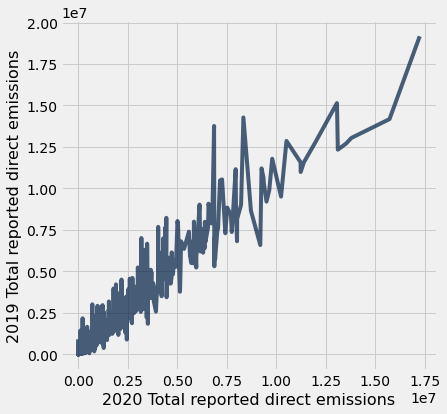

In [109]:
LRIT_new.plot("2020 Total reported direct emissions", "2019 Total reported direct emissions")
#plot.xticks(rotation = 90)
#plt.plot(LRIT_new.column("Latest Reported Industry Type (sectors)"), LRIT_new.column("2020 Total reported direct emissions"))

In [170]:
# LRIT_new.select("State", "2020 Total reported direct emissions").plot()
len(set(LRIT_new["State"]))

54

In [173]:
#new_LQ = LRIT_new.where("State", are.equal_to("NC"))
#new_LQ
u_state = LRIT_new["State"]
def get_unique_states(u_state):
    l_un = []
    un = set(u_state)
    for i in un:
        l_un.append(i)
    return l_un

print(get_unique_states(u_state))

['GA', 'WY', 'CA', 'NJ', 'SD', 'WV', 'DC', 'MI', 'AK', 'SC', 'NC', 'HI', 'KS', 'LA', 'MN', 'NY', 'MT', 'TN', 'CO', 'KY', 'OK', 'UT', 'VT', 'NE', 'PR', 'MD', 'OR', 'ID', 'NV', 'AZ', 'IL', 'WA', 'NH', 'TX', 'OH', 'AL', 'RI', 'AR', 'NM', 'VA', 'IN', 'WI', 'PA', 'ND', 'IA', 'VI', 'MA', 'MS', 'MO', 'GU', 'DE', 'FL', 'CT', 'ME']


In [256]:
# create a visual that shows the average gas emission per state for each year
# Do I need to rename the columns for each year to just the year or keep it as is
# Since I have been mostly using numpy, is there a way to group the dataframe based on the amount 
# of times each state appears without using groupby

list_state = get_unique_states(u_state)
def get_yr_averages(list_state):
    avg_2020 = []
    avg_2019 = []
    avg_2018 = []
    avg_2017 = []
    avg_2016 = []
    avg_2015 = []
    avg_2014 = []
    avg_2013 = []
    avg_2012 = []
    avg_2011 = []
    
    for i in list_state:
        avg_2020.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2020 Total reported direct emissions")))
        avg_2019.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2019 Total reported direct emissions")))
        avg_2018.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2018 Total reported direct emissions")))
        avg_2017.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2017 Total reported direct emissions")))
        avg_2016.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2016 Total reported direct emissions")))
        avg_2015.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2015 Total reported direct emissions")))
        avg_2014.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2014 Total reported direct emissions")))
        avg_2013.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2013 Total reported direct emissions")))
        avg_2012.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2012 Total reported direct emissions")))
        avg_2011.append(np.mean(LRIT_new.where("State", are.equal_to(i)).column("2011 Total reported direct emissions")))
    return avg_2020, avg_2019, avg_2018, avg_2017, avg_2016, avg_2015, avg_2014, avg_2013, avg_2012, avg_2011 





In [196]:
LRIT_new2 = Table().with_columns("State", get_unique_states(u_state),
                                "avg_dir_emi_2020", get_yr_averages(list_state)[0],
                                "avg_dir_emi_2019", get_yr_averages(list_state)[1],
                                "avg_dir_emi_2018", get_yr_averages(list_state)[2],
                                "avg_dir_emi_2017", get_yr_averages(list_state)[3],
                                "avg_dir_emi_2016", get_yr_averages(list_state)[4],
                                "avg_dir_emi_2015", get_yr_averages(list_state)[5],
                                "avg_dir_emi_2014", get_yr_averages(list_state)[6],
                                "avg_dir_emi_2013", get_yr_averages(list_state)[7],
                                "avg_dir_emi_2012", get_yr_averages(list_state)[8],
                                "avg_dir_emi_2011", get_yr_averages(list_state)[9])
LRIT_new2

State,avg_dir_emi_2020,avg_dir_emi_2019,avg_dir_emi_2018,avg_dir_emi_2017,avg_dir_emi_2016,avg_dir_emi_2015,avg_dir_emi_2014,avg_dir_emi_2013,avg_dir_emi_2012,avg_dir_emi_2011
GA,366202,456664,483012,475729,525226,498960,528360,493890,500063,573928
WY,890367,918889,997855,1.01543e+06,993392,1.04633e+06,1.03321e+06,1.10605e+06,1.09055e+06,1.04584e+06
CA,267298,270011,280788,274287,285022,304676,314562,308220,307490,272484
NJ,205449,247170,249244,248947,283882,303829,300052,274258,276851,267593
SD,171352,212071,195750,188734,190485,164922,218685,209819,197020,191707
WV,806923,903919,951962,1.03748e+06,1.0731e+06,1.02008e+06,1.06798e+06,1.01172e+06,977229,1.03507e+06
DC,74524.9,78312.1,83111.2,73391.4,72517.5,74391.6,83726,76683.7,79983,86010.9
MI,351387,420069,445420,428560,425475,451845,440028,463903,470725,474466
AK,243100,242683,243742,253176,248567,259508,256931,267854,279223,273918
SC,378638,397266,451121,404387,445828,469162,507020,443975,500550,551281


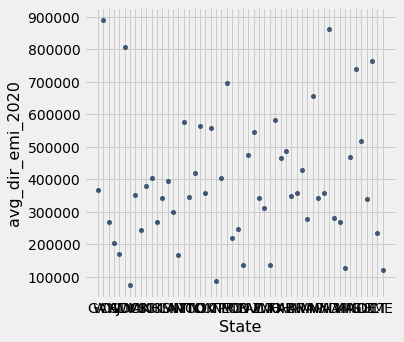

In [ ]:
np.random.seed(1234)
shape,loc,scale=scipy.stats.lognorm.fit(samples,floc=0)
num_bins=50
clr="#EFEFEF"

In [262]:
r1 = (LRIT_new2["avg_dir_emi_2020"] - LRIT_new2["avg_dir_emi_2019"])/1
r2 = (LRIT_new2["avg_dir_emi_2019"] - LRIT_new2["avg_dir_emi_2018"])/1
r3 = (LRIT_new2["avg_dir_emi_2018"] - LRIT_new2["avg_dir_emi_2017"])/1
r4 = (LRIT_new2["avg_dir_emi_2017"] - LRIT_new2["avg_dir_emi_2016"])/1
r5 = (LRIT_new2["avg_dir_emi_2016"] - LRIT_new2["avg_dir_emi_2015"])/1
r6 = (LRIT_new2["avg_dir_emi_2015"] - LRIT_new2["avg_dir_emi_2014"])/1
r7 = (LRIT_new2["avg_dir_emi_2014"] - LRIT_new2["avg_dir_emi_2013"])/1
r8 = (LRIT_new2["avg_dir_emi_2013"] - LRIT_new2["avg_dir_emi_2012"])/1
r9 = (LRIT_new2["avg_dir_emi_2012"] - LRIT_new2["avg_dir_emi_2011"])/1

LRIT_new3 = Table().with_columns("State", get_unique_states(u_state),
                                "2019-2020", r1,
                                "2018-2019", r2,
                                "2017-2018", r3,
                                "2016-2017", r4,
                                "2015-2016", r5,
                                "2014-2015", r6,
                                "2013-2014", r7,
                                "2012-2013", r8,
                                "2011-2012", r9)
#plt.plot(np.unique(LRIT_new3["State"]), np.poly1d(np.polyfit(LRIT_new3["State"], LRIT_new3["2019-2020"], 1))(np.unique(LRIT_new3["State"])))
LRIT_new3
#plt.plot(LRIT_new3["State"])
#plt.colorbar()
#plt.xticks(rotation = 90, fontsize = 6)
#plt.xlabel('States', fontsize=14)
#plt.ylabel("Average Difference in Direct Emissions (Kt)", fontsize = 14)

State,2019-2020,2018-2019,2017-2018,2016-2017,2015-2016,2014-2015,2013-2014,2012-2013,2011-2012
GA,-90462.6,-26348,7283.44,-49497.5,26265.9,-29399.3,34469.6,-6172.64,-73864.9
WY,-28521.6,-78966,-17577.1,22039.8,-52938.3,13123.6,-72843.7,15497.3,44710.6
CA,-2713.39,-10777.1,6501.22,-10735.2,-19653.6,-9885.65,6341.93,730.223,35005.8
NJ,-41720.6,-2074.12,297.343,-34935,-19946.8,3776.82,25794.1,-2593.24,9258.01
SD,-40719.6,16321.6,7015.25,-1750.53,25562.9,-53762.6,8865.35,12799.5,5312.67
WV,-96995.8,-48043,-85514.8,-35620.2,53015.9,-47900.6,56258.8,34494.4,-57836.4
DC,-3787.24,-4799.04,9719.76,873.88,-1874.09,-9334.41,7042.35,-3299.32,-6027.95
MI,-68682.3,-25351.2,16860.5,3084.5,-26369.8,11816.7,-23874.6,-6822.52,-3740.86
AK,417.326,-1059.01,-9434.73,4609.2,-10940.8,2576.65,-10922.4,-11368.8,5304.79
SC,-18628.2,-53855.4,46734.9,-41441.1,-23334.1,-37858.8,63045.1,-56574.9,-50730.3


In [268]:
def standard_units(array):
    x = (array - np.mean(array)) / np.std(array)
    return x

def correlation(array1, array2):
    a = np.mean(standard_units(array1) * standard_units(array2))
    return a

# This computes the correlation between the different variables in between years
cor_2020_2019 = correlation(LRIT_new2.column("avg_dir_emi_2020"), LRIT_new2.column("avg_dir_emi_2019"))
cor_2019_2018 = correlation(LRIT_new2.column("avg_dir_emi_2019"), LRIT_new2.column("avg_dir_emi_2018"))
cor_2018_2017 = correlation(LRIT_new2.column("avg_dir_emi_2018"), LRIT_new2.column("avg_dir_emi_2017"))
cor_2017_2016 = correlation(LRIT_new2.column("avg_dir_emi_2017"), LRIT_new2.column("avg_dir_emi_2016"))
cor_2016_2015 = correlation(LRIT_new2.column("avg_dir_emi_2016"), LRIT_new2.column("avg_dir_emi_2015"))
cor_2015_2014 = correlation(LRIT_new2.column("avg_dir_emi_2015"), LRIT_new2.column("avg_dir_emi_2014"))
cor_2014_2013 = correlation(LRIT_new2.column("avg_dir_emi_2014"), LRIT_new2.column("avg_dir_emi_2013"))
cor_2013_2012 = correlation(LRIT_new2.column("avg_dir_emi_2013"), LRIT_new2.column("avg_dir_emi_2012"))
cor_2012_2011 = correlation(LRIT_new2.column("avg_dir_emi_2012"), LRIT_new2.column("avg_dir_emi_2011"))

correlation_table = Table().with_columns("Year", ["2011-2012", "2012-2013", "2013-2014", 
                                                  "2014-2015", "2015-2016", "2016-2017",
                                                 "2017-2018", "2018-2019", "2019-2020"],
                                        "Correlations", [cor_2012_2011, cor_2013_2012, cor_2014_2013,
                                                        cor_2015_2014, cor_2016_2015, cor_2017_2016,
                                                        cor_2018_2017, cor_2019_2018, cor_2020_2019])
correlation_table


Year,Correlations
2011-2012,0.865244
2012-2013,0.986228
2013-2014,0.993493
2014-2015,0.990702
2015-2016,0.991803
2016-2017,0.987941
2017-2018,0.992221
2018-2019,0.988337
2019-2020,0.97388


Text(0, 0.5, 'Correlation')

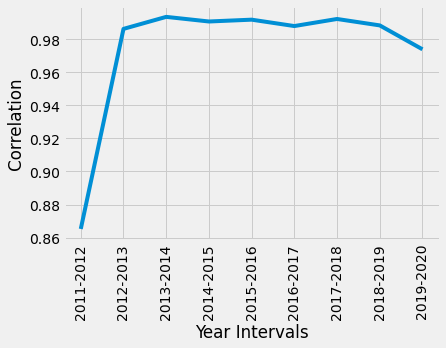

In [270]:
plt.plot(correlation_table.column("Year"), correlation_table.column("Correlations"))
plt.xticks(rotation = 90)
plt.xlabel("Year Intervals")
plt.ylabel("Correlation")

In [245]:
LRIT_new3.select("State", "2011-2012").sort("2011-2012", descending = False)

State,2011-2012
VI,-978155
GU,-116181
KY,-83045.9
GA,-73864.9
MD,-63457.9
MO,-59683.2
WV,-57836.4
NH,-54505.9
PR,-52160.6
SC,-50730.3


In [247]:
LRIT_new4 = Table().with_columns("State", get_unique_states(u_state),
                                "2011-2020", (LRIT_new2["avg_dir_emi_2020"] - LRIT_new2["avg_dir_emi_2011"])/9)
LRIT_new4.sort("2011-2020", descending = False)

State,2011-2020
VI,-122741
KY,-46399.5
MD,-33204.5
IN,-29122.5
MT,-28155.1
TN,-26624.6
PR,-26531.4
NM,-25985.4
MO,-25429.5
WV,-25349.1


In [230]:
df_2020 = LRIT_new2.select("State", "avg_dir_emi_2020").sort("avg_dir_emi_2020", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2020["State"],
    x=df_2020["avg_dir_emi_2020"] ))
fig.update_layout(title='2020 Average Direct Emissions ',xaxis_title="Average Emissions(2020)",yaxis_title="States",title_x=0.5)
fig.show()

In [240]:
df_2019 = LRIT_new2.select("State", "avg_dir_emi_2019").sort("avg_dir_emi_2019", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2019["State"],
    x=df_2019["avg_dir_emi_2019"] ))
fig.update_layout(title='2019 Average Direct Emissions ',xaxis_title="Average Emissions(2019)",yaxis_title="States",title_x=0.5)
fig.show()

In [252]:
df_2018 = LRIT_new2.select("State", "avg_dir_emi_2018").sort("avg_dir_emi_2018", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2018["State"],
    x=df_2018["avg_dir_emi_2018"] ))
fig.update_layout(title='2018 Average Direct Emissions ',xaxis_title="Average Emissions(2018)",yaxis_title="States",title_x=0.5)
fig.show()

In [253]:
df_2017 = LRIT_new2.select("State", "avg_dir_emi_2017").sort("avg_dir_emi_2017", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2017["State"],
    x=df_2017["avg_dir_emi_2017"] ))
fig.update_layout(title='2017 Average Direct Emissions ',xaxis_title="Average Emissions(2017)",yaxis_title="States",title_x=0.5)
fig.show()

In [212]:
df_2016 = LRIT_new2.select("State", "avg_dir_emi_2016").sort("avg_dir_emi_2016", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2016["State"],
    x=df_2016["avg_dir_emi_2016"] ))
fig.update_layout(title='2016 Average Direct Emissions ',xaxis_title="Average Emissions(2016)",yaxis_title="States",title_x=0.5)
fig.show()

In [213]:
df_2015 = LRIT_new2.select("State", "avg_dir_emi_2015").sort("avg_dir_emi_2015", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2015["State"],
    x=df_2015["avg_dir_emi_2015"] ))
fig.update_layout(title='2015 Average Direct Emissions ',xaxis_title="Average Emissions(2015)",yaxis_title="States",title_x=0.5)
fig.show()

In [221]:
df_2014 = LRIT_new2.select("State", "avg_dir_emi_2014").sort("avg_dir_emi_2014", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2014["State"],
    x=df_2014["avg_dir_emi_2014"] ))
fig.update_layout(title='2014 Average Direct Emissions ',xaxis_title="Average Emissions(2014)",yaxis_title="States",title_x=0.5)
fig.show()

In [219]:
df_2013 = LRIT_new2.select("State", "avg_dir_emi_2013").sort("avg_dir_emi_2013", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2013["State"],
    x=df_2013["avg_dir_emi_2013"] ))
fig.update_layout(title='2013 Average Direct Emissions ',xaxis_title="Average Emissions(2013)",yaxis_title="States",title_x=0.5)
fig.show()

In [216]:
df_2012 = LRIT_new2.select("State", "avg_dir_emi_2012").sort("avg_dir_emi_2012", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2012["State"],
    x=df_2012["avg_dir_emi_2012"] ))
fig.update_layout(title='2012 Average Direct Emissions ',xaxis_title="Average Emissions(2012)",yaxis_title="States",title_x=0.5)
fig.show()

In [231]:
df_2011 = LRIT_new2.select("State", "avg_dir_emi_2011").sort("avg_dir_emi_2011", descending = True)
fig = go.Figure(go.Funnel(
    y=df_2011["State"],
    x=df_2011["avg_dir_emi_2011"] ))
fig.update_layout(title='2011 Average Direct Emissions ',xaxis_title="Average Emissions(2011)",yaxis_title="States",title_x=0.5)
fig.show()